Importing all the required libraries

In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

Read Battary_RUL Dataset

In [2]:
Battary_RUL = pd.read_csv('Battery_RUL.csv')
Battary_RUL.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
Battary_RUL.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [5]:
Battary_RUL.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [6]:
Battary_RUL.duplicated().sum()

0

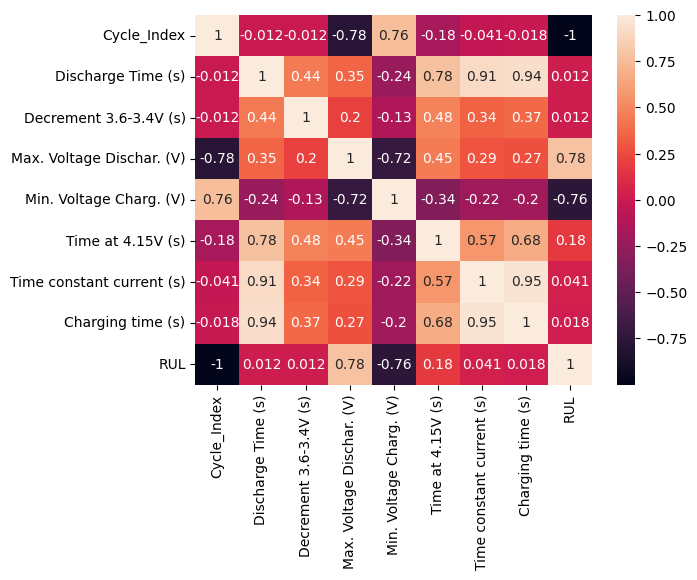

In [7]:
sns.heatmap(Battary_RUL.corr(),annot = True)
plt.show()

Split Battary_RUL DataSet into target and features

In [8]:
X = Battary_RUL.drop(columns=['Cycle_Index' , 'RUL'])
Y = Battary_RUL['RUL']

In [9]:
X

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65
...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62


In [10]:
Y

0        1112
1        1111
2        1110
3        1109
4        1107
         ... 
15059       4
15060       3
15061       2
15062       1
15063       0
Name: RUL, Length: 15064, dtype: int64

Split DataSet into train and test without Cross_Validation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Training The Model using Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

reg.fit(X_train ,Y_train)

y_pred = reg.predict(X_test)


Evaluate the performance on the training set and the test set


In [13]:

train_score = reg.score(X_train, Y_train)
print("Score on Training Set: {:.2%}".format(train_score))

test_score = reg.score(X_test, Y_test)
print("Score on Test Set: {:.2%}".format(test_score))

Score on Training Set: 78.53%
Score on Test Set: 81.32%


Split DataSet into train and test using Cross_Validation and Training the Model

In [14]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()

num_folds = 10
kFold = KFold(n_splits = num_folds, shuffle=True, random_state=0)
cross_val_results = cross_val_score(reg1 ,X ,Y, cv=kFold)

print(f'Cross-Validation Results (Accuracy): {cross_val_results * 100}')
print(f'Mean Accuracy: {cross_val_results.mean()*100} ')


Cross-Validation Results (Accuracy): [84.00325095 75.38565099 84.97026231 83.44498623 76.81869301 67.51550706
 82.56651763 77.48274469 82.98629981 74.86129312]
Mean Accuracy: 79.00352058081938 


Evaluate the performance of the Model by mean_squared_error, mean_absolute_error, r2_score

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2 *100)

Mean Squared Error: 19441.2348662745
Mean Absolute Error: 94.1467676247924
R-squared (Coefficient of Determination): 81.3244570979802


C:\Users\rewan ahmed\AppData\Local\Temp\ipykernel_17952\1583629098.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
C:\Users\rewan ahmed\AppData\Local\Temp\ipykernel_17952\1583629098.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


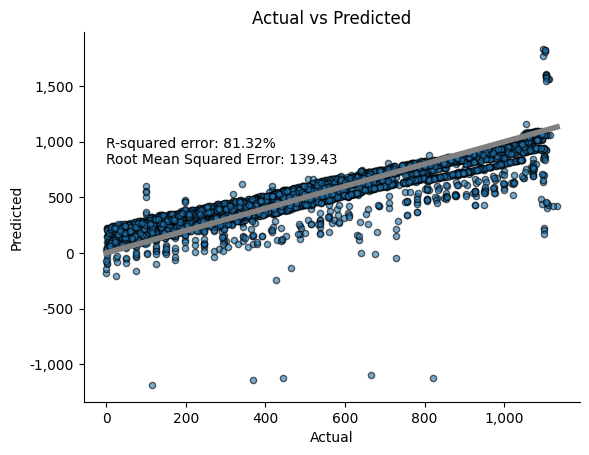

In [16]:
fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=Y_test,
                y=y_pred,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(Y_test),max(Y_test)],
             y=[min(Y_test),max(Y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(reg.score(X_test,Y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(Y_test,y_pred,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()